# Get data

In [1]:
# To run this notebook, follow the next steps:
# 1. You need to download the archive.zip file from https://www.kaggle.com/datasets/sonainjamil/bleached-corals-detection
# 2. Create a folder named 'Bleached_and_Unbleached_Corals_Classification/' inside the 'raw_data' folder
# 3. Copy the archive.zip file into the 'Bleached_and_Unbleached_Corals_Classification/' folder
# 4. Define the 'path_data' variable below with the path to the 'raw_data/Bleached_and_Unbleached_Corals_Classification/' folder on your local machine.

path_data = '/Users/et/code/Lucia-Cordero/ReefSight-Project/raw_data/Bleached_and_Unbleached_Corals_Classification/'

In [2]:
import zipfile
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
# Function to unzip files
def unzip_files(zip_file_path, extract_to):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print(f"Files extracted to {extract_to}")

In [4]:
# Function to load and display a random image from a folder
def load_random_image(folder_path):
    extracted_files = [f for f in os.listdir(folder_path)]
    random_file = random.choice(extracted_files)
    img_path = os.path.join(folder_path, random_file)
    img = Image.open(img_path)

    # Display the image
    plt.imshow(img)
    plt.title(random_file)
    plt.axis('off')
    plt.show()

In [5]:
# Unzip and organize data

import shutil

# Define paths
path_unzipped_folder = os.path.join(path_data, 'Train')

# Unzip the data
zip_file_path = os.path.join(path_data, 'archive.zip')
unzip_files(zip_file_path, path_data)

# Move folders to the desired structure
train_folder = os.path.join(path_data, "Train")
bleached_src = os.path.join(train_folder, "Bleached")
unbleached_src = os.path.join(train_folder, "Unbleached")
bleached_dst = os.path.join(path_data, "Bleached")
unbleached_dst = os.path.join(path_data, "Unbleached")

# Directory cleaning:
# Move Bleached and Unbleached folders if they exist
if os.path.exists(bleached_src):
    shutil.move(bleached_src, bleached_dst)
if os.path.exists(unbleached_src):
    shutil.move(unbleached_src, unbleached_dst)

# FOR MAC USERS!
# Remove .DS_Store if present (Mac users)
# TODO ADAPTION FOR WINDOWS USERS
ds_store_path = os.path.join(train_folder, ".DS_Store")
if os.path.exists(ds_store_path):
    os.remove(ds_store_path)

# Remove the now-empty Train folder
if os.path.exists(train_folder):
    os.rmdir(train_folder)

Files extracted to /Users/et/code/Lucia-Cordero/ReefSight-Project/raw_data/Bleached_and_Unbleached_Corals_Classification/


Random image from 'Bleached' folder:


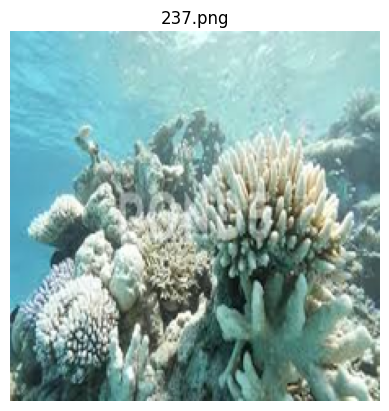

Random image from 'Unbleached' folder:


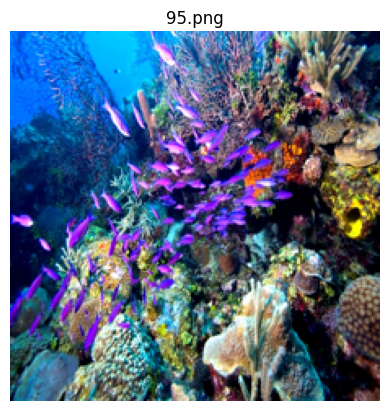

In [6]:
# Plot random images from both categories

# Define the paths to the extracted folders
bleached_folder = os.path.join(path_data, "Bleached")
unbleached_folder = os.path.join(path_data, "Unbleached")

# Load and display a random image from both folders
print("Random image from 'Bleached' folder:")
load_random_image(bleached_folder)

print("Random image from 'Unbleached' folder:")
load_random_image(unbleached_folder)

# Create train, test, val datasets

In [7]:
! pip install split-folders # TODO: Put to requirements later

In [8]:
# Split data into training, validation, and test sets

import splitfolders
import shutil

bleached_folder = os.path.join(path_data, "Bleached")
unbleached_folder = os.path.join(path_data, "Unbleached")

# Splits data into train, val, and test folders (e.g., 80%, 10%, 10% ratio)
model_data_dir = os.path.join(path_data, "model_data_split")
splitfolders.ratio(path_data, output=model_data_dir, seed=42, ratio=(0.8, 0.1, 0.1)) # TODO Think again about ratio

# Directory cleaning:
# Remove the original folders to avoid confusion
bleached_folder = os.path.join(path_data, "Bleached")
unbleached_folder = os.path.join(path_data, "Unbleached")

if os.path.exists(bleached_folder):
    shutil.rmtree(bleached_folder)
if os.path.exists(unbleached_folder):
    shutil.rmtree(unbleached_folder)

Copying files: 342 files [00:00, 5640.23 files/s]


In [9]:
# Define paths to the new datasets
bleached_train_set = os.path.join(model_data_dir, 'train', 'Bleached')
bleached_val_set = os.path.join(model_data_dir, 'val', 'Bleached')
bleached_test_set = os.path.join(model_data_dir, 'test', 'Bleached')

unbleached_train_set = os.path.join(model_data_dir, 'train', 'Unbleached')
unbleached_val_set = os.path.join(model_data_dir, 'val', 'Unbleached')
unbleached_test_set = os.path.join(model_data_dir, 'test', 'Unbleached')

# Baseline model

In [10]:
# Create a baseline CNN model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import layers, optimizers, Input

image_size = (224, 224)
input_shape = image_size + (3,)
num_classes = 2
learning_rate = 0.001

def create_baseline_cnn(input_shape, num_classes=2, learning_rate=0.001):

    # Build the model
    model = Sequential()
    # Normalize pixel values to [0,1] inside the model so saved model includes preprocessing
    model.add(layers.Rescaling(1./255, input_shape=input_shape)) # TODO: Look up again what this does
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(2, 2))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(2, 2))
    model.add(layers.Flatten()) # TODO: Look up again what this does
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.5))

    if num_classes == 2:
        model.add(layers.Dense(1, activation='sigmoid'))
    else:
        model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    adam = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    if num_classes == 2:
        model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
    else:
        model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

baseline_model = create_baseline_cnn(input_shape, num_classes, learning_rate)
baseline_model.summary()

/Users/et/.pyenv/versions/3.10.6/envs/ReefSight-Project/lib/python3.10/site-packages/keras/src/layers/preprocessing/data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     5,972,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,049,409 (23.08 MB)

 Trainable params: 6,049,409 (23.08 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Load data using image_dataset_from_directory
from tensorflow.keras.utils import image_dataset_from_directory

batch_size = 32
seed=42

train_data_dir = os.path.join(model_data_dir, 'train')
val_data_dir = os.path.join(model_data_dir, 'val')
test_data_dir = os.path.join(model_data_dir, 'test')

train_ds = image_dataset_from_directory(
    train_data_dir,
    labels="inferred",
    label_mode="binary",
    seed=seed,
    image_size=image_size, # TODO: Let others know that this resizes images to 224x224
    batch_size=batch_size
)

val_ds = image_dataset_from_directory(
    val_data_dir,
    labels="inferred",
    label_mode="binary",
    seed=seed,
    image_size=image_size,
    batch_size=batch_size
)

test_ds = image_dataset_from_directory(
    test_data_dir,
    labels="inferred",
    label_mode="binary",  # TODO: Change to 'categorical' if data set has more than 2 classes (put everything in a function)
    seed=seed,
    image_size=image_size,
    batch_size=batch_size
)

print("Class names train dataset:", train_ds.class_names)
print("Class names validation dataset:", val_ds.class_names)
print("Class names test dataset:", test_ds.class_names)

Found 273 files belonging to 2 classes.
Found 33 files belonging to 2 classes.
Found 36 files belonging to 2 classes.
Class names train dataset: ['Bleached', 'Unbleached']
Class names validation dataset: ['Bleached', 'Unbleached']
Class names test dataset: ['Bleached', 'Unbleached']


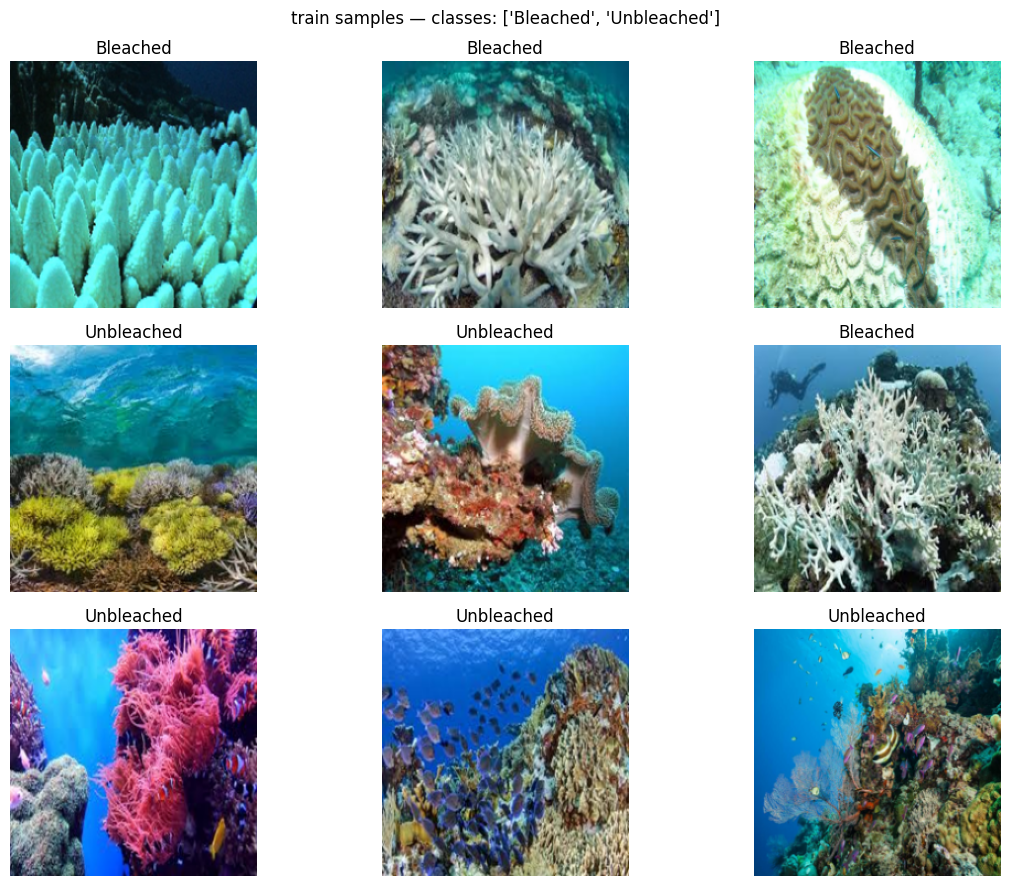

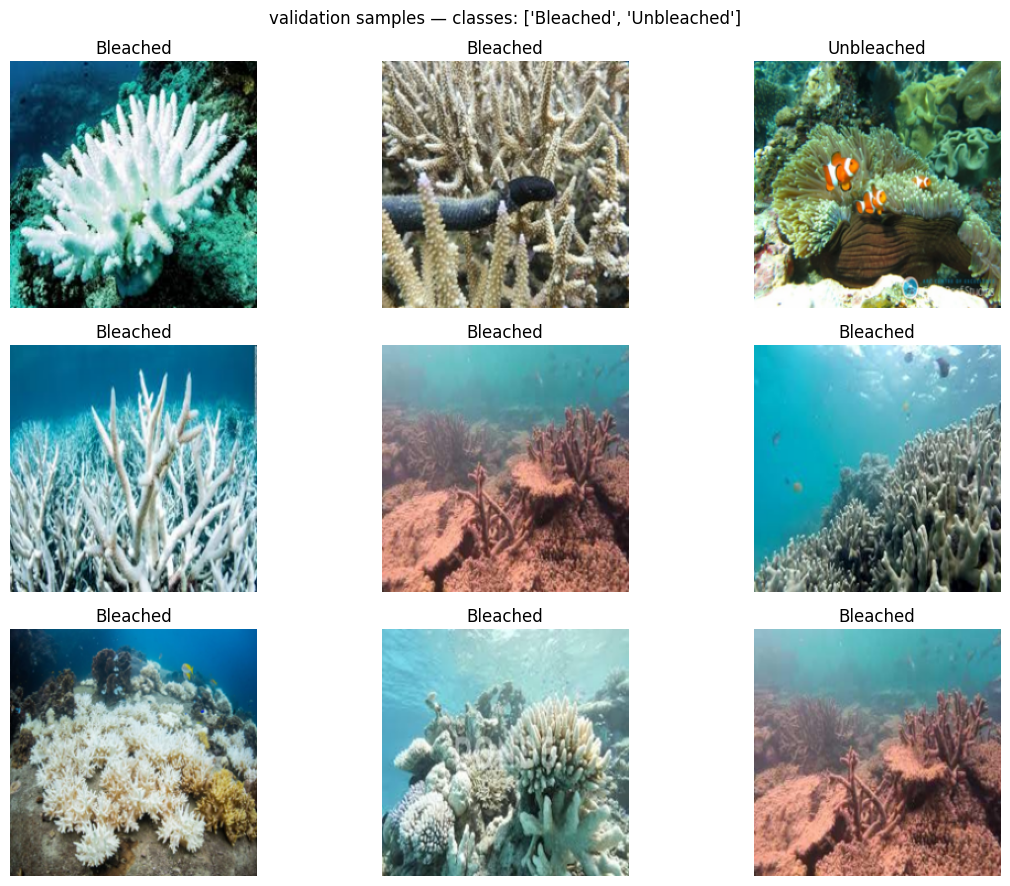

In [12]:
# Optional: visualize some samples from the datasets to check if they are labeled correctly
def plot_dataset_samples(ds, dataset_name='dataset', n=9):
    class_names = ds.class_names
    images, labels = next(iter(ds))  # take one batch
    labels = labels.numpy().astype(int).ravel()
    num = min(n, images.shape[0])
    idxs = random.sample(range(images.shape[0]), k=num)

    cols = 3
    rows = (num + cols - 1) // cols
    plt.figure(figsize=(cols * 4, rows * 3))
    for i, idx in enumerate(idxs):
        ax = plt.subplot(rows, cols, i + 1)
        img = images[idx].numpy().astype('uint8')
        plt.imshow(img)
        plt.title(class_names[labels[idx]])
        plt.axis('off')
    plt.suptitle(f"{dataset_name} samples — classes: {class_names}")
    plt.tight_layout()
    plt.show()

# Show 9 random samples from train and validation sets
plot_dataset_samples(train_ds, dataset_name='train', n=9)
plot_dataset_samples(val_ds, dataset_name='validation', n=9)

In [13]:
# Train the baseline model using tf.data `train_ds` and `val_ds`

# Configure callbacks
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                     patience=10,
                                     restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(os.path.join(model_data_dir, 'baseline_best.keras'),
                                       monitor='val_loss',
                                       save_best_only=True), # What does ModelCheckpoint do?
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                         factor=0.5,
                                         patience=2,
                                         verbose=1), # What does ReduceLROnPlateau do?
]

# Train using datasets
epochs = 1000

history = baseline_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=callbacks,
)

# Save final model
baseline_model.save(os.path.join(path_data, 'baseline_model.keras'))

Epoch 1/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 654ms/step - accuracy: 0.5861 - loss: 1.3361 - val_accuracy: 0.6061 - val_loss: 0.6390 - learning_rate: 0.0010
Epoch 2/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 646ms/step - accuracy: 0.7289 - loss: 0.5221 - val_accuracy: 0.7576 - val_loss: 0.3691 - learning_rate: 0.0010
Epoch 3/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 623ms/step - accuracy: 0.8901 - loss: 0.3116 - val_accuracy: 0.8182 - val_loss: 0.5593 - learning_rate: 0.0010
Epoch 4/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 595ms/step - accuracy: 0.8788 - loss: 0.2906
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 620ms/step - accuracy: 0.8901 - loss: 0.2844 - val_accuracy: 0.8485 - val_loss: 0.4030 - learning_rate: 0.0010
Epoch 5/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 619ms/step - accuracy: 0.9048 - loss: 0.2599 - val_accuracy: 0.7576 - val_loss: 0.4240 - learning_rate: 5.0000e-04
Epoch 6/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 592ms/step - accuracy: 0.8914 - loss: 0.3021
E

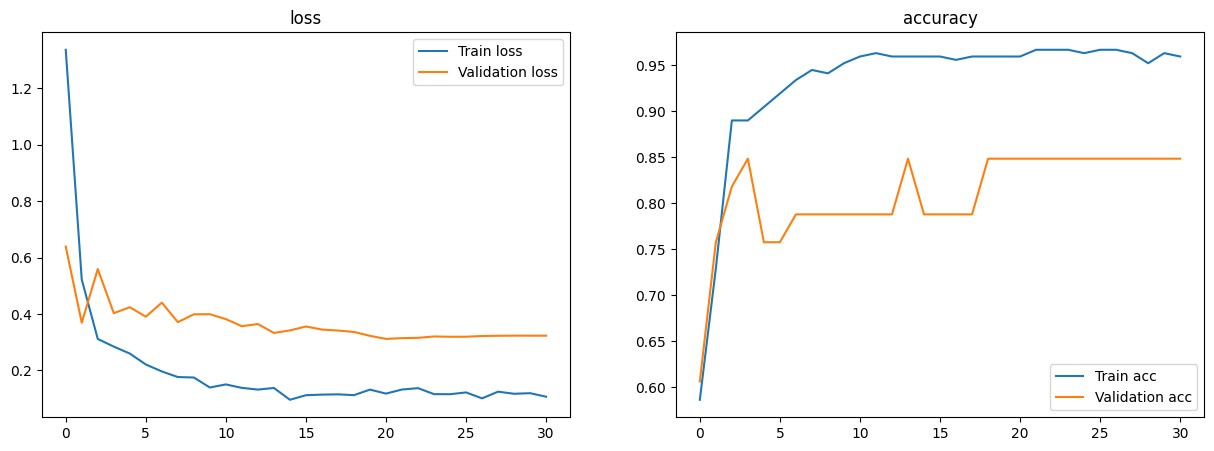

In [14]:
# Plot training history

def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

plot_history(history)

In [15]:
# Evaluate the model on the test dataset

test_loss, test_accuracy = baseline_model.evaluate(test_ds)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8889 - loss: 0.2216 
Test Loss: 0.22156542539596558
Test Accuracy: 0.8888888955116272


# Prediction ==> PREDICTING THE WRONG CLASS!!!!

## e.g.:
## Randomly Selected Image True Class: Unbleached
## Predicted Class: Bleached
## Probability of Bleached: 100.00%

Class names test dataset: ['Bleached', 'Unbleached']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Randomly Selected Image True Class: Unbleached
Predicted Class: Bleached
Probability of Bleached: 100.00%


2025-12-09 21:33:55.128908: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
/var/folders/d9/v5_06vd52pj5h82bcx8qbzbm0000gn/T/ipykernel_4717/251298184.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_class_index = int(true_label.numpy())


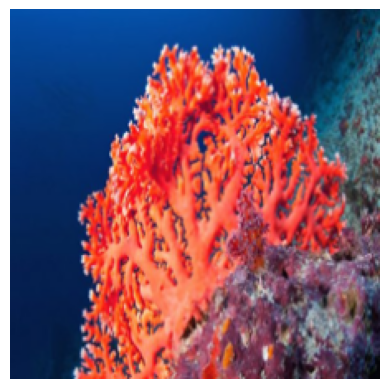

In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image

## Choose a random image from the test dataset for prediction
# Create a list of class names
class_names = test_ds.class_names
print("Class names test dataset:", test_ds.class_names)

# Get the number of images in the test dataset
num_images = sum(1 for _ in test_ds)

# Randomly choose an index
random_index = random.randint(0, num_images - 1)

# Retrieve the randomly selected image and its label
for i, (images, labels) in enumerate(test_ds):
    if i == random_index:
        new_image = images[0]  # Retrieve the first image in the batch
        true_label = labels[0]  # Retrieve the corresponding label
        break

# Make predictions
predictions = baseline_model.predict(np.expand_dims(new_image, axis=0))  # Add batch dimension

# Get predicted probabilities directly
predicted_probabilities = predictions[0]

# Get the predicted class index (if needed)
predicted_class_index = np.argmax(predicted_probabilities)

# Print the results
true_class_index = int(true_label.numpy())
print(f"Randomly Selected Image True Class: {class_names[true_class_index]}")
print(f"Predicted Class: {class_names[predicted_class_index]}")

# Print predicted probabilities for each class
for class_name, probability in zip(class_names, predicted_probabilities):
    print(f"Probability of {class_name}: {probability*100:.2f}%")

# (Optional) To visualize the image
plt.imshow(new_image / 255.0)  # Normalize for visualization
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


2025-12-09 21:33:55.558035: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


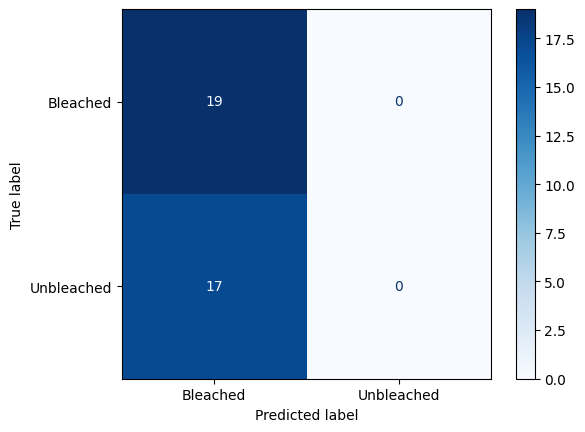

In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get true labels and predictions for the entire test dataset
y_true = []
y_pred = []

# Iterate through the test dataset to collect predictions
for images, labels in test_ds:
    y_true.extend(labels.numpy())
    predictions = baseline_model.predict(images)
    predicted_class = np.argmax(predictions, axis=1)
    y_pred.extend(predicted_class)

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues')
plt.show()


In [18]:
# Todo additonally (other TODOs in the code above):
# - Function for loading data?
# - Which data for predictions? How can we predict on new images?
# - Look up again what image_dataset_from_directory does?
# - Implement data augmentation?
# - What does the other callbacks do?